In [10]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import numpy as np
import pandas as pd


var_num = 10
problem = get_problem("zdt1", var_num)

algorithm = NSGA2(pop_size=50)
res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               save_history=True,
               seed=1,
               verbose=False)

history = res.history

data_list = []
for entry in history:
    gen = entry.n_gen
    pop = entry.pop
    for ind in pop:
        data_dict = {}
        for i, x in enumerate(ind.X):
            data_dict[f"x{i + 1}"] = x
        data_dict["f1"] = ind.F[0]
        data_dict["f2"] = ind.F[1]
        data_dict["gen"] = gen
        data_dict["RANK"] = np.nan
        data_list.append(data_dict)

df = pd.DataFrame(data_list)
df.to_csv(r'Final_data/ZDT1_10var100gen.csv')

df_only_objectives = df[["f1", "f2"]]
df_only_objectives.to_csv(r'Final_data/only_objectives.csv', header=False, index=False)

In [14]:
import numpy as np
import pandas as pd
import NonDominatedSorting as nds
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# Load csv file
f_data = np.genfromtxt('Final_data/only_objectives.csv', delimiter=',')
nds_obj = nds.NonDominatedSorting()
fronts, ranks = nds_obj.do(f_data, return_rank=True)  # This will return fronts and ranks separately

# Create a DataFrame
d = pd.DataFrame(columns=['f1', 'f2', 'rank'])

# Populate the DataFrame
for rank, solution_indices in enumerate(fronts):
    for idx in solution_indices:
        # Using idx to get the solution from f_data and its rank
        f1, f2 = f_data[idx]
        d.loc[len(d.index)] = [f1, f2, rank]

print(d)
print('End')


            f1        f2  rank
0     0.279981  0.481010   0.0
1     0.279981  0.481010   0.0
2     0.082643  0.718064   0.0
3     0.082643  0.718064   0.0
4     0.082643  0.718064   0.0
...        ...       ...   ...
4995  0.950176  4.411700  71.0
4996  0.176196  5.676324  71.0
4997  0.187632  5.573861  71.0
4998  0.326645  5.430488  71.0
4999  0.000402  7.342977  71.0

[5000 rows x 3 columns]
End


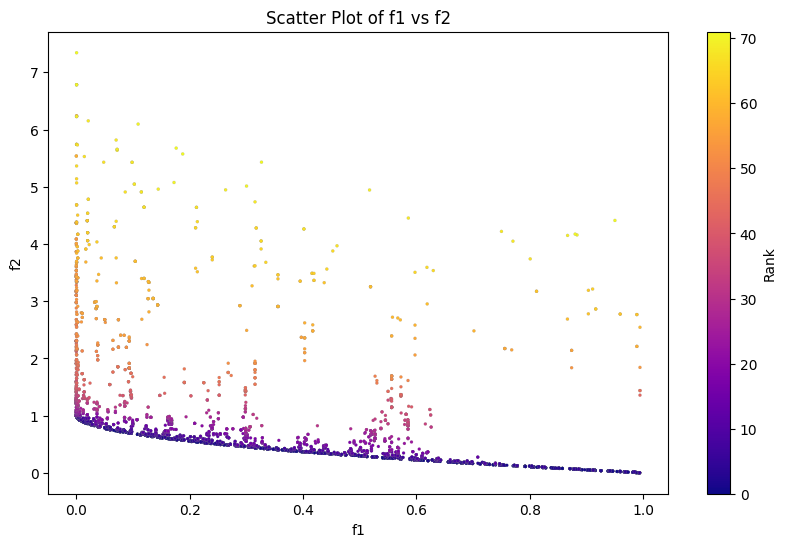

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(d['f1'], d['f2'], c=d['rank'], cmap='plasma', marker='o',s=5, linewidths=0.1, edgecolor='gray')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Scatter Plot of f1 vs f2')
plt.colorbar(scatter, label='Rank')
plt.show()


In [16]:
csv_data = d[['f1', 'f2', 'rank']]

csv_file_path = 'Final_data/f1_f2_ranks.csv'

csv_data.to_csv(csv_file_path, index=False)

csv_file_path

'Final_data/f1_f2_ranks.csv'

In [17]:
zdt1_df = pd.read_csv('Final_data/ZDT1_10var100gen.csv')

ranks_df = pd.read_csv('Final_data/f1_f2_ranks.csv')

combined_df = pd.merge(zdt1_df, ranks_df, on=['f1', 'f2'])

combined_df.head()

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0           0  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   
1           0  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   
2           0  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   
3          61  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   
4          61  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   

        x7        x8        x9       x10        f1        f2  gen  RANK  rank  
0  0.18626  0.345561  0.396767  0.538817  0.417022  2.482199    1   NaN  58.0  
1  0.18626  0.345561  0.396767  0.538817  0.417022  2.482199    1   NaN  58.0  
2  0.18626  0.345561  0.396767  0.538817  0.417022  2.482199    1   NaN  58.0  
3  0.18626  0.345561  0.396767  0.538817  0.417022  2.482199    2   NaN  58.0  
4  0.18626  0.345561  0.396767  0.538817  0.417022  2.482199    2   NaN  58.0

In [18]:
combined_df.drop(columns=['RANK'], inplace=True)
combined_df.rename(columns={'rank': 'RANK'}, inplace=True)
combined_df.drop_duplicates(subset=['f1', 'f2', 'gen', 'RANK'], inplace=True)
sorted_by_unnamed_df = combined_df.sort_values(by='Unnamed: 0').reset_index(drop=True)
sorted_by_unnamed_df.head()

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0           0  0.417022  0.720324  0.000114  0.302333  0.146756  0.092339   
1           1  0.019367  0.678836  0.211628  0.265547  0.491573  0.053363   
2           2  0.019880  0.026211  0.028306  0.246211  0.860028  0.538831   
3           3  0.556240  0.136455  0.059918  0.121343  0.044552  0.107494   
4           4  0.000402  0.976759  0.376580  0.973784  0.604716  0.828846   

         x7        x8        x9       x10        f1        f2  gen  RANK  
0  0.186260  0.345561  0.396767  0.538817  0.417022  2.482199    1  58.0  
1  0.574118  0.146729  0.589306  0.699758  0.019367  4.408805    1  63.0  
2  0.552822  0.842031  0.124173  0.279184  0.019880  4.198771    1  64.0  
3  0.225709  0.712989  0.559717  0.012556  0.556240  1.693099    1  52.0  
4  0.574712  0.628076  0.285576  0.586833  0.000402  6.783459    1  70.0

In [19]:
# Save the sorted and cleaned DataFrame to a CSV file
csv_file_path_sorted = 'Final_data/training_data_ZDT1_10var_100gen.csv'
sorted_by_unnamed_df.to_csv(csv_file_path_sorted, index=False)

# Return the file path for download
csv_file_path_sorted


'Final_data/training_data_ZDT1_10var_100gen.csv'

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import NonDominatedSorting as nds
import plotly.io as pio
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
df_gen = pd.read_csv('Final_data/training_data_ZDT1_10var_100gen.csv')

# Recreate the generation segments and calculate rank separators
gen_ranges = [(i, i+9) for i in range(1, 92, 10)]
df_gen['gen_filter'] = 0

# Assign the generation segment (gen_filter) for each entry
for i, (start_gen, end_gen) in enumerate(gen_ranges, 1):
    df_gen.loc[(df_gen['gen'] >= start_gen) & (df_gen['gen'] <= end_gen), 'gen_filter'] = i
# Initialize NonDominatedSorting object
nds_obj = nds.NonDominatedSorting()

# Calculate local ranks for each generation filter
for filter_num in df_gen['gen_filter'].unique():
    filter_df = df_gen[df_gen['gen_filter'] == filter_num]
    objectives = filter_df[['f1', 'f2']].to_numpy()
    _, local_ranks = nds_obj.do(objectives, return_rank=True)
    df_gen.loc[filter_df.index, 'RANK'] = local_ranks

# Calculate the rank separator for each generation segment and assign Pareto flags
rank_separators = {}
percentile_for_split = 50
for filter_num in df_gen['gen_filter'].unique():
    segment_df = df_gen[df_gen['gen_filter'] == filter_num]
    rank_separator = segment_df['RANK'].quantile(percentile_for_split / 100.0)
    rank_separators[f'Gen_{filter_num}'] = rank_separator
    df_gen.loc[segment_df.index, 'pareto'] = segment_df['RANK'].apply(lambda x: 1 if x <= rank_separator else 0)

color_palette = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

markers = {1: 'circle', 0: 'x'}

fig = make_subplots(rows=1, cols=1)

# Add "Gen vs Rank" traces
for i, gen_filter in enumerate(sorted(df_gen['gen_filter'].unique()), start=0):
    for pareto in df_gen['pareto'].unique():
        df_filtered = df_gen[(df_gen['gen_filter'] == gen_filter) & (df_gen['pareto'] == pareto)]
        trace = go.Scatter(
            x=df_filtered['gen'],
            y=df_filtered['RANK'],
            mode='markers',
            marker=dict(symbol=markers[pareto], size=5, color=color_palette[i]),
            name=f'Gen Filter {gen_filter}, Pareto {int(pareto)}'
        )
        fig.add_trace(trace)

# Adjusting color assignment based on Pareto value
pareto_colors = {0: '#1f77b4', 1: '#ff7f0e'}  # Mapping Pareto values to specific colors
for i, gen_filter in enumerate(sorted(df_gen['gen_filter'].unique()), start=0):
    for pareto in df_gen['pareto'].unique():
        df_filtered = df_gen[(df_gen['gen_filter'] == gen_filter) & (df_gen['pareto'] == pareto)]
        
        # Create a list of strings for the tooltip, including the rank information
        tooltip_texts = [f'f1: {f1}<br>f2: {f2}<br>Rank: {rank}' for f1, f2, rank in zip(df_filtered['f1'], df_filtered['f2'], df_filtered['RANK'])]
        
        trace = go.Scatter(
            x=df_filtered['f1'],
            y=df_filtered['f2'],
            mode='markers',
            marker=dict(symbol=markers[pareto], size=5, color=pareto_colors[pareto]),
            name=f'Gen Filter {gen_filter}, Pareto {int(pareto)}',
            text=tooltip_texts,  # Add this line to include the custom tooltip text
            hoverinfo='text',  # Specify that the tooltip should only display the text provided
            visible=False  # Adjust visibility as needed
        )
        fig.add_trace(trace)

# Prepare the visibility arrays for the dropdowns
total_gen_traces = len(df_gen['gen_filter'].unique()) * len(df_gen['pareto'].unique())
gen_vs_rank_visibility = [True] * total_gen_traces + [False] * total_gen_traces
f1_vs_f2_visibility = [False] * total_gen_traces + [True] * total_gen_traces

# Define dropdown buttons for switching between "Gen vs Rank" and "f1 vs f2"
buttons = [
    dict(label='Gen vs Rank',
         method='update',
         args=[{'visible': gen_vs_rank_visibility},
               {'title': 'Generation vs. Rank'}]),
    dict(label='f1 vs f2',
         method='update',
         args=[{'visible': f1_vs_f2_visibility},
               {'title': 'Objective 1 vs. Objective 2'}]),
]

gen_buttons = []
for i, gen_filter in enumerate(sorted(df_gen['gen_filter'].unique()), start=0):
    visibility = [False] * total_gen_traces + [i == j for j in range(len(df_gen['gen_filter'].unique())) for _ in range(len(df_gen['pareto'].unique()))]
    segment_df = df_gen[df_gen['gen_filter'] == gen_filter]
    min_rank = segment_df['RANK'].min()
    max_rank = segment_df['RANK'].max()
    rank_separator = rank_separators[f'Gen_{gen_filter}']
    dynamic_title = f'Gen Filter {gen_filter} - Min Rank: {min_rank}, Max Rank: {max_rank}, Rank Separator: {rank_separator}'
    gen_buttons.append(
        dict(
            label=f'Gen Filter {gen_filter}',
            method='update',
            args=[{'visible': visibility},
                  {'title': dynamic_title}]
        )
    )
# First dropdown for switching views
dropdown1 = dict(buttons=buttons, direction="down", showactive=True, x=0.0, xanchor="left", y=1.1, yanchor="top")

# Second dropdown for "f1 vs f2" gen filters
dropdown2 = dict(buttons=gen_buttons, direction="down", showactive=True, x=0.25, xanchor="left", y=1.1, yanchor="top")

# Update the figure layout with dropdowns
fig.update_layout(
    updatemenus=[dropdown1, dropdown2],
    # title="Dynamic Plot: Select View",
    legend=dict(title='Generation Filters', orientation="h"),
    width=800,
    height=600,
)

fig.show()


Processing gen_filter 1
5/5 [==============================] - 0s 2ms/step


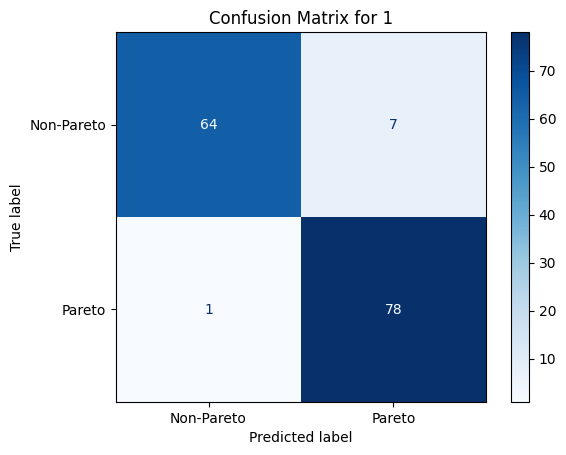

Metrics for gen_filter 1: Accuracy: 94.67%, Precision: 91.76%, F1 Score: 95.12%

Processing gen_filter 2
5/5 [==============================] - 0s 2ms/step


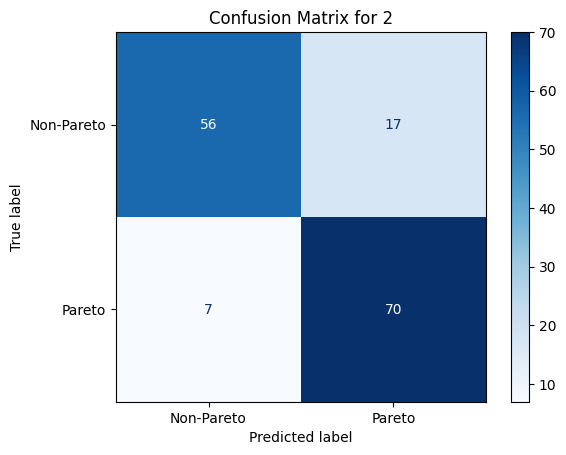

Metrics for gen_filter 2: Accuracy: 84.00%, Precision: 80.46%, F1 Score: 85.37%

Processing gen_filter 3
5/5 [==============================] - 0s 2ms/step


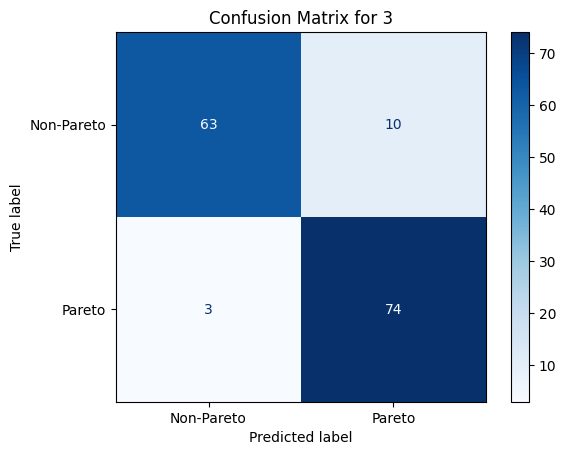

Metrics for gen_filter 3: Accuracy: 91.33%, Precision: 88.10%, F1 Score: 91.93%

Processing gen_filter 4
5/5 [==============================] - 0s 2ms/step


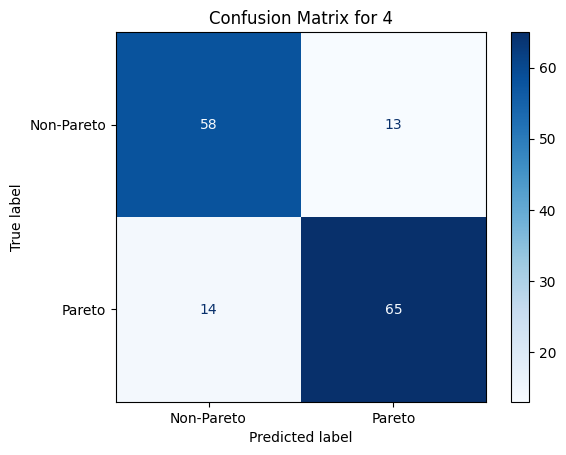

Metrics for gen_filter 4: Accuracy: 82.00%, Precision: 83.33%, F1 Score: 82.80%

Processing gen_filter 5
5/5 [==============================] - 0s 2ms/step


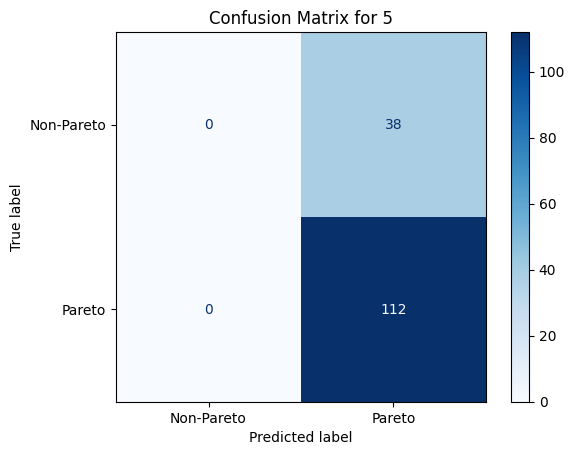

Metrics for gen_filter 5: Accuracy: 74.67%, Precision: 74.67%, F1 Score: 85.50%

Processing gen_filter 6
5/5 [==============================] - 0s 2ms/step


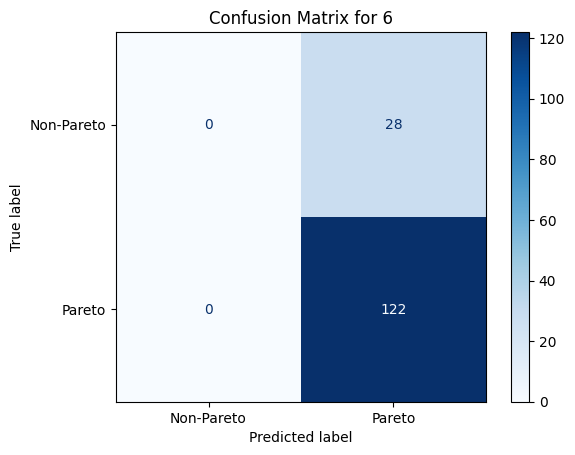

Metrics for gen_filter 6: Accuracy: 81.33%, Precision: 81.33%, F1 Score: 89.71%

Processing gen_filter 7
5/5 [==============================] - 0s 2ms/step


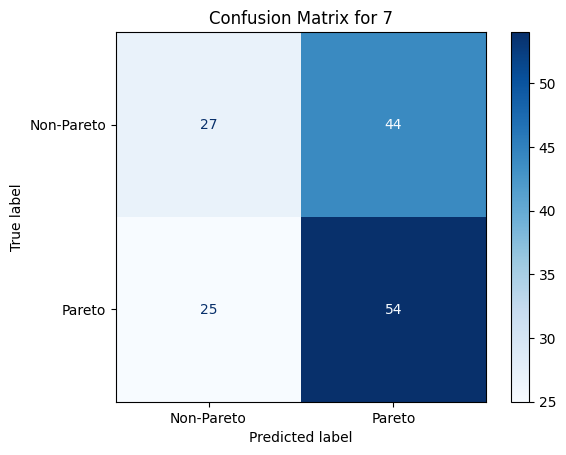

Metrics for gen_filter 7: Accuracy: 54.00%, Precision: 55.10%, F1 Score: 61.02%

Processing gen_filter 8
5/5 [==============================] - 0s 2ms/step


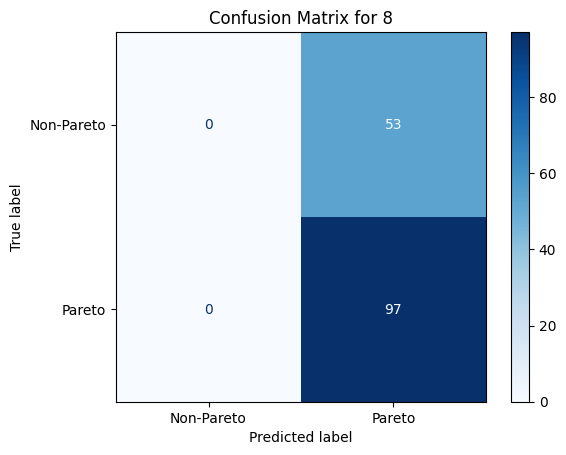

Metrics for gen_filter 8: Accuracy: 64.67%, Precision: 64.67%, F1 Score: 78.54%

Processing gen_filter 9
5/5 [==============================] - 0s 2ms/step


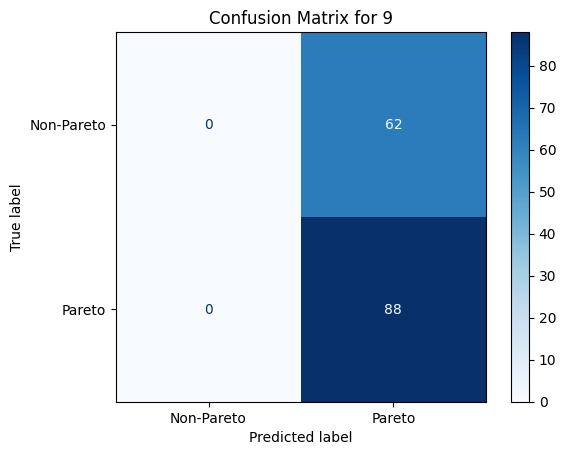

Metrics for gen_filter 9: Accuracy: 58.67%, Precision: 58.67%, F1 Score: 73.95%

Processing gen_filter 10
5/5 [==============================] - 0s 2ms/step


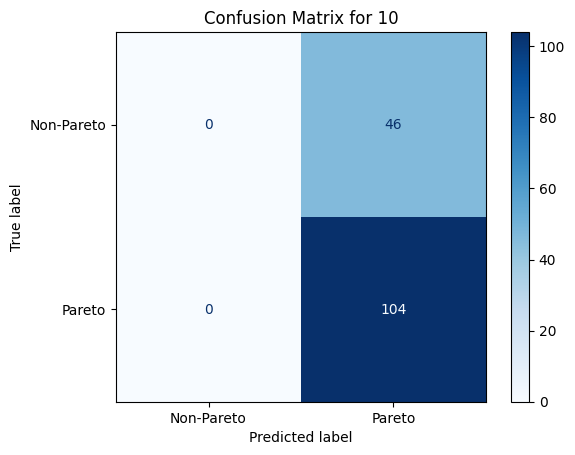

Metrics for gen_filter 10: Accuracy: 69.33%, Precision: 69.33%, F1 Score: 81.89%



In [2]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import precision_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
# df_gen.drop(columns=['Unnamed: 0', 'gen', 'RANK'], inplace=True)
# Adjusted to store multiple metrics
metrics_scores = {'accuracy': {}, 'precision': {}, 'f1_score': {}}

for gen_filter in sorted(df_gen['gen_filter'].unique()):
    print(f"Processing gen_filter {gen_filter}")
    df_filtered = df_gen[df_gen['gen_filter'] == gen_filter]
    
    X = df_filtered.drop(['pareto','f1','f2','gen_filter','Unnamed: 0', 'gen', 'RANK'], axis=1)
    y = df_filtered['pareto']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
    
    # Predictions for precision and F1 score calculation
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    # Generating the confusion matrix
    
    cm = confusion_matrix(y_test, np.round(y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Pareto', 'Pareto'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {gen_filter}')
    plt.show()
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_scores['accuracy'][gen_filter] = accuracy * 100
    metrics_scores['precision'][gen_filter] = precision * 100
    metrics_scores['f1_score'][gen_filter] = f1 * 100
    print(f'Metrics for gen_filter {gen_filter}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, F1 Score: {f1*100:.2f}%\n')

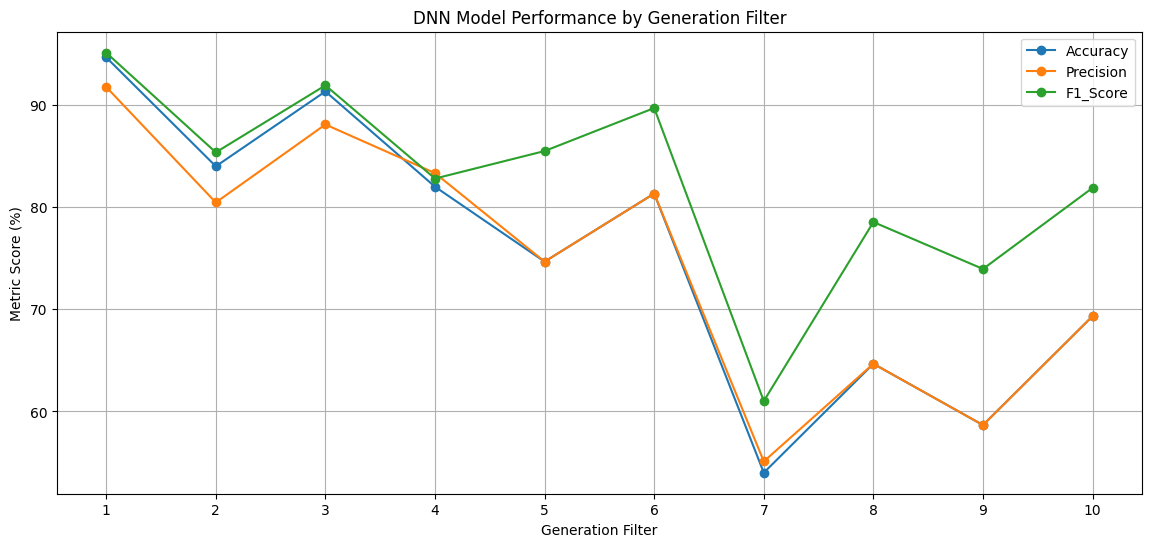

In [5]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plotting each metric
for metric, scores in metrics_scores.items():
    gen_filters = list(scores.keys())
    metric_values = list(scores.values())
    plt.plot(gen_filters, metric_values, marker='o', linestyle='-', label=metric.title())

plt.title('DNN Model Performance by Generation Filter')
plt.xlabel('Generation Filter')
plt.ylabel('Metric Score (%)')
plt.xticks(gen_filters)  # Ensure all generation filters are shown
plt.legend()
plt.grid(True)
plt.savefig('Incremental_Images/DNN_Model_Performance_by_Generation_Filter.png', dpi=400)
plt.show()


In [6]:
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
import NonDominatedSorting as nds
df_gen = pd.read_csv('training_data_ZDT1_10var_100gen.csv')

gen_ranges = [(i, i+9) for i in range(1, 92, 10)]
df_gen['gen_filter'] = 0

for i, (start_gen, end_gen) in enumerate(gen_ranges, 1):
    df_gen.loc[(df_gen['gen'] >= start_gen) & (df_gen['gen'] <= end_gen), 'gen_filter'] = i

# Initialize the NDS object
nds_obj = nds.NonDominatedSorting()

rank_separators = {}
gen_dataframes = {}

percentile_for_split = 50

# Process each cumulative generation range
for i, (start_gen, end_gen) in enumerate(gen_ranges, 1):
    # Select data up to the current end_gen
    df_filtered = df_gen[df_gen['gen'] <= end_gen].copy()
    
    # Perform NDS to calculate local ranks within this cumulative range
    objectives = df_filtered[['f1', 'f2']].to_numpy()  # Adjust column names as needed
    _, local_ranks = nds_obj.do(objectives, return_rank=True)
    df_filtered['RANK'] = local_ranks
    
    # Calculate the rank separator based on these local ranks
    rank_separator = np.quantile(local_ranks, percentile_for_split / 100.0)
    rank_separators[f'Gen_1_to_{end_gen}'] = rank_separator
    
    # Assign Pareto flags based on the rank separator
    df_filtered['pareto'] = (df_filtered['RANK'] <= rank_separator).astype(int)
    
    # Include the rank_separator in the DataFrame
    df_filtered['rank_separator'] = rank_separator
    
    # Store this DataFrame
    gen_dataframes[f'1-{end_gen}'] = df_filtered


# Adjusting the plot to include gen filter functionality for "F1 vs F2" as specified
fig = make_subplots(rows=1, cols=1)

# Color palette, markers, and pareto colors as provided
color_palette = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

markers = {1: 'circle', 0: 'x'}
pareto_colors = {0: '#1f77b4', 1: '#ff7f0e'}

# Initial trace setup
trace_visibility = {'Gen vs Rank': [], 'F1 vs F2': []}

# "Gen vs Rank" traces
for i, (gen_range, df) in enumerate(gen_dataframes.items()):
    for pareto_value in [0, 1]:
        df_filtered = df[df['pareto'] == pareto_value]
        marker_color = 'rgba' + str(matplotlib.colors.to_rgba(color_palette[i % len(color_palette)], 0.5))
        trace = go.Scatter(
            x=df_filtered['gen'],
            y=df_filtered['RANK'],
            mode='markers',
            marker=dict(symbol=markers[pareto_value], size=5, 
                        # color=color_palette[i % len(color_palette)]
                        color=marker_color),
                        line=dict(
                            color='black',  # Border color
                            width=1
                        ),
            name=f'Range {gen_range}, Pareto {pareto_value}'
        )
        fig.add_trace(trace)
        trace_visibility['Gen vs Rank'].append(True)
        trace_visibility['F1 vs F2'].append(False)

# Correctly adding "F1 vs F2" traces using gen_dataframes
for i, (gen_range, df) in enumerate(gen_dataframes.items()):
    for pareto_value in [0, 1]:
        df_filtered = df[df['pareto'] == pareto_value]
        marker_color = 'rgba' + str(matplotlib.colors.to_rgba(pareto_colors[pareto_value], 0.5))
        tooltip_texts = [f'f1: {f1}<br>f2: {f2}<br>Rank: {rank}' for f1, f2, rank in zip(df_filtered['f1'], df_filtered['f2'], df_filtered['RANK'])]
        trace = go.Scatter(
            x=df_filtered['f1'],
            y=df_filtered['f2'],
            mode='markers',
            # marker=dict(symbol=markers[pareto_value], size=5, color=pareto_colors[pareto_value]),
            marker=dict(symbol=markers[pareto_value], size=5, 
                        # color=color_palette[i % len(color_palette)]
                        color=marker_color),
                        line=dict(
                            color='black',  # Border color
                            width=1
                        ),
            name=f'Range {gen_range}, Pareto {pareto_value}',
            text=tooltip_texts,
            hoverinfo='text', 
            visible=False  # Initially invisible
        )
        fig.add_trace(trace)
        trace_visibility['Gen vs Rank'].append(False)
        trace_visibility['F1 vs F2'].append(True)


# Preparing dropdown buttons for "Gen vs Rank" and "F1 vs F2" views
buttons = [
    dict(label='Gen vs Rank',
         method='update',
         args=[{'visible': trace_visibility['Gen vs Rank']},
               {'title': 'Generation vs. Rank'}]),
    dict(label='F1 vs F2',
         method='update',
         args=[{'visible': trace_visibility['F1 vs F2']},
               {'title': 'F1 vs F2'}]),
]

gen_buttons = []
for i, (gen_range, df) in enumerate(gen_dataframes.items()):
    visibility = [False] * len(fig.data)
    # Only make the corresponding "F1 vs F2" traces visible
    visibility[len(gen_dataframes) * 2 + i*2 : len(gen_dataframes) * 2 + i*2 + 2] = [True, True]
    
    min_rank = df['RANK'].min()
    max_rank = df['RANK'].max()
    rank_separator = df['rank_separator'].iloc[0]  # Assuming all rows have the same value
    dynamic_title = f'Gen Filter {gen_range} - Min Rank: {min_rank}, Max Rank: {max_rank}, Rank Separator: {rank_separator}'
    
    gen_buttons.append({
        'label': f'Gen Filter {gen_range}',
        'method': 'update',
        'args': [{'visible': visibility}, {'title': dynamic_title}]
    })

# Setup dropdowns for the plot
fig.update_layout(
    updatemenus=[
        dict(buttons=buttons, direction="down", showactive=True, x=0.0, xanchor="left", y=1.1, yanchor="top"),
        dict(buttons=gen_buttons, direction="down", showactive=True, x=0.25, xanchor="left", y=1.1, yanchor="top")
    ],
    title="Dynamic Plot: Select View or Generation Filter",
    legend=dict(title="Generation Filters and Pareto", orientation="h"),
    width=800,
    height=600
)

# Attempting to show the figure
fig.show()

Processing 1-10
5/5 [==============================] - 0s 3ms/step


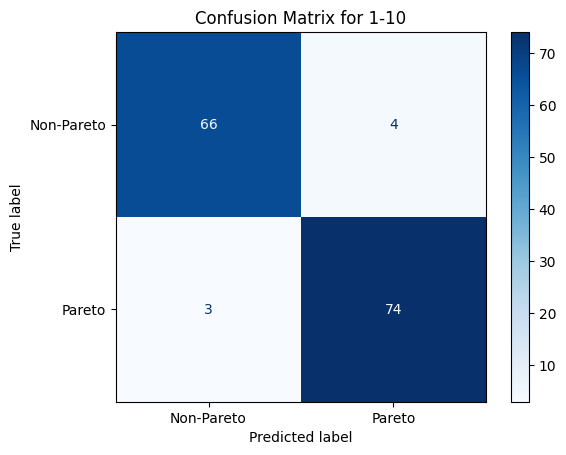

Accuracy for 1-10: 95.24%
Precision for 1-10: 94.87%
f1score for 1-10: 95.48%
Processing 1-20
10/10 [==============================] - 0s 2ms/step


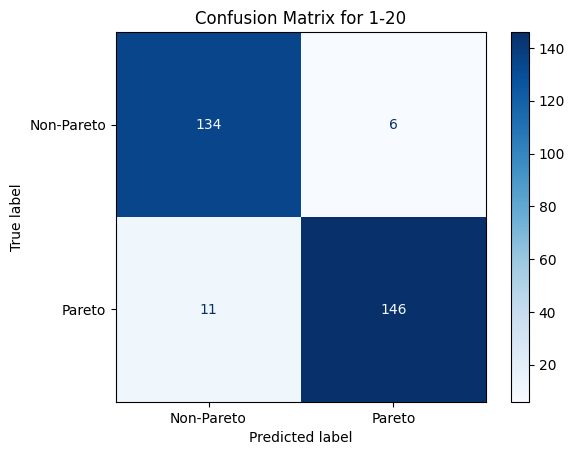

Accuracy for 1-20: 94.28%
Precision for 1-20: 96.05%
f1score for 1-20: 94.50%
Processing 1-30
14/14 [==============================] - 0s 2ms/step


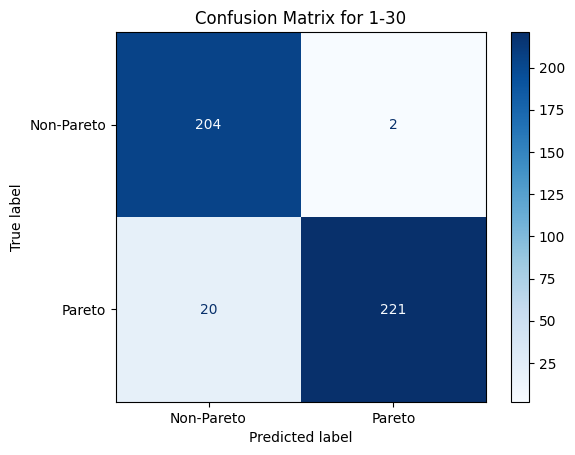

Accuracy for 1-30: 95.08%
Precision for 1-30: 99.10%
f1score for 1-30: 95.26%
Processing 1-40
19/19 [==============================] - 0s 2ms/step


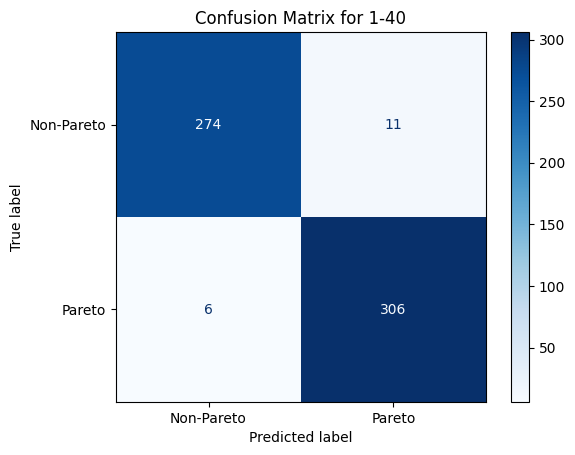

Accuracy for 1-40: 97.15%
Precision for 1-40: 96.53%
f1score for 1-40: 97.30%
Processing 1-50
24/24 [==============================] - 0s 1ms/step


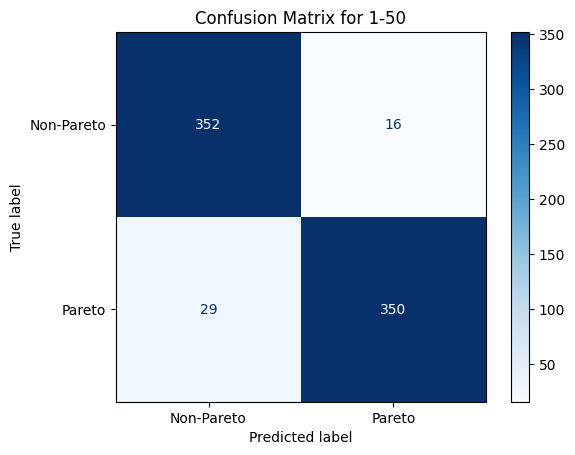

Accuracy for 1-50: 93.98%
Precision for 1-50: 95.63%
f1score for 1-50: 93.96%
Processing 1-60
29/29 [==============================] - 0s 2ms/step


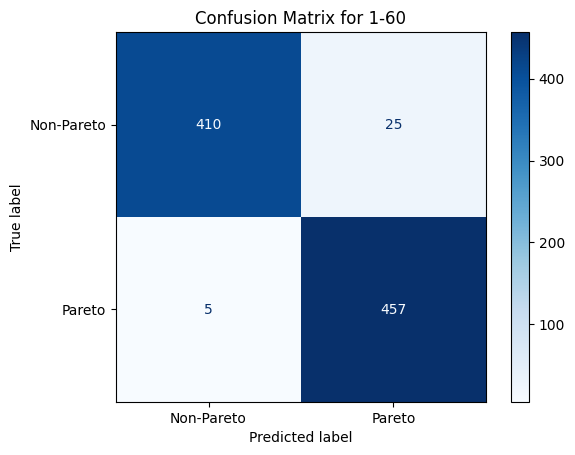

Accuracy for 1-60: 96.66%
Precision for 1-60: 94.81%
f1score for 1-60: 96.82%
Processing 1-70
33/33 [==============================] - 0s 2ms/step


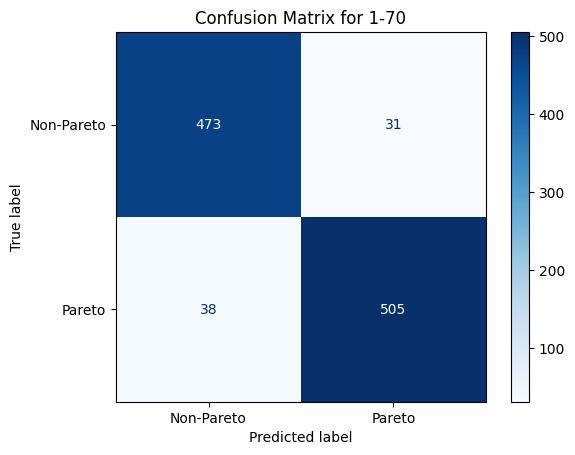

Accuracy for 1-70: 93.41%
Precision for 1-70: 94.22%
f1score for 1-70: 93.61%
Processing 1-80
38/38 [==============================] - 0s 2ms/step


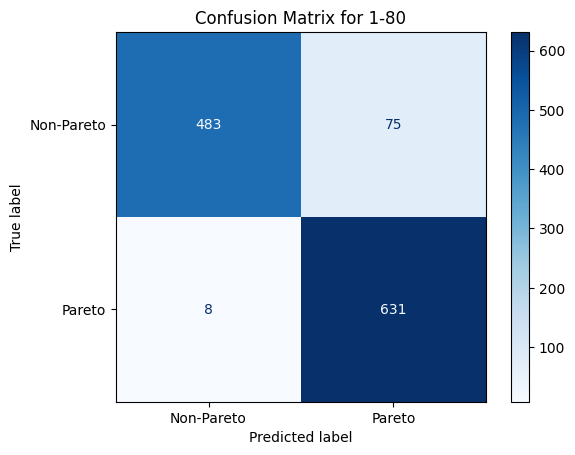

Accuracy for 1-80: 93.07%
Precision for 1-80: 89.38%
f1score for 1-80: 93.83%
Processing 1-90
43/43 [==============================] - 0s 2ms/step


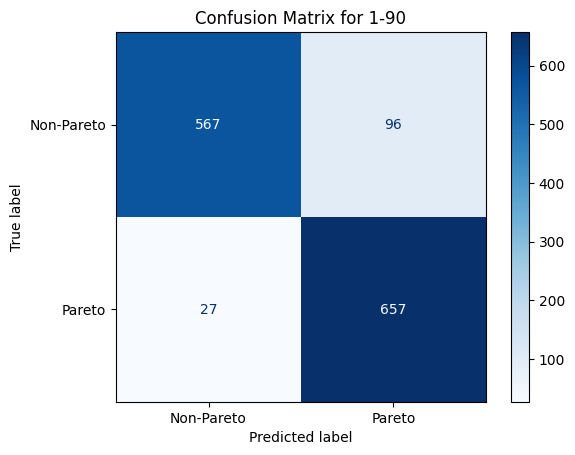

Accuracy for 1-90: 90.87%
Precision for 1-90: 87.25%
f1score for 1-90: 91.44%
Processing 1-100
47/47 [==============================] - 0s 1ms/step


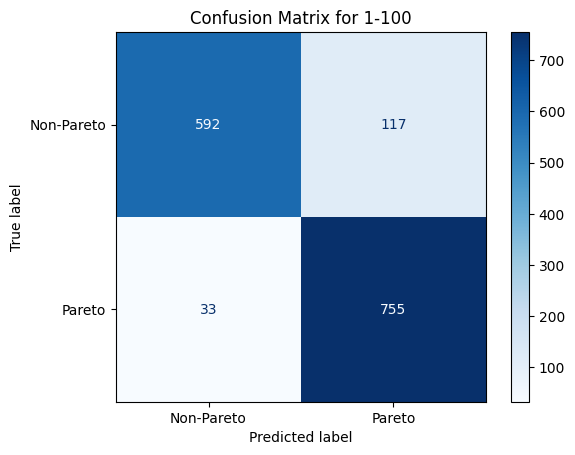

Accuracy for 1-100: 89.98%
Precision for 1-100: 86.58%
f1score for 1-100: 90.96%


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import precision_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import keras
import plotly.graph_objs as go
from plotly.subplots import make_subplots


scores = {}
# Assuming gen_dataframes is a dictionary of DataFrames, each representing data for a range_label
for range_label, df_range in gen_dataframes.items():
    print(f"Processing {range_label}")
    
    X = df_range.drop(['pareto', 'f1', 'f2', 'gen_filter', 'Unnamed: 0', 'gen', 'RANK','rank_separator'], axis=1)
    y = df_range['pareto']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_real = model.predict(X_test).flatten()
    y_pred_binary = (y_real > 0.5).astype(int)

    # Find indices where predictions are incorrect
    incorrect_indices = np.where(y_pred_binary != y_test)[0]

    incorrect_y_test = y_test.iloc[incorrect_indices].values
    incorrect_y_real = y_real[incorrect_indices]
    # Create the scatter plot
    fig = go.Figure()

    # Now when adding traces to the plot, we can use this function to find the closest match
    fig.add_trace(go.Scatter(
        x=incorrect_y_real,  # Original values without jitter for x-axis
        y=incorrect_y_test,  # Actual outcomes for y-axis
        mode='markers',
        marker=dict(color='red', size=5, opacity=0.6),
        name='Incorrect Predictions'
    ))
    # Update the layout
    fig.update_layout(
        title='Incorrect Predictions vs. Actual Outcomes (with Jitter and Counts)',
        xaxis_title='Predicted Probability (y_real) with Jitter',
        yaxis_title='Actual Outcome',
        legend_title='Legend',
        width=800,
        height=600
    )

    # Show the plot
    fig.show()

    # Generating the confusion matrix
    cm = confusion_matrix(y_test, np.round(y_pred_binary))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Pareto', 'Pareto'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {range_label}')
    plt.show()

    # Prepare data for the scatter plot
    f1 = df_range.loc[X_test.index, 'f1']
    f2 = df_range.loc[X_test.index, 'f2']

    # Correctly and incorrectly predicted indices
    TP = (y_pred_binary == 1) & (y_test == 1)
    TN = (y_pred_binary == 0) & (y_test == 0)
    FP = (y_pred_binary == 1) & (y_test == 0)
    FN = (y_pred_binary == 0) & (y_test == 1)

    # Now create the scatter plot with plotly
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Scatter(x=f1[TP], y=f2[TP], mode='markers', name='Pareto (Correct)',
                             marker=dict(color='orange', size=5, symbol='circle')))
    fig.add_trace(go.Scatter(x=f1[TN], y=f2[TN], mode='markers', name='Non-Pareto (Correct)',
                             marker=dict(color='blue', size=5, symbol='x')))
    fig.add_trace(go.Scatter(x=f1[FP], y=f2[FP], mode='markers', name='Non-Pareto (Incorrect)',
                             marker=dict(color='red', size=5, symbol='x')))
    fig.add_trace(go.Scatter(x=f1[FN], y=f2[FN], mode='markers', name='Pareto (Incorrect)',
                             marker=dict(color='black', size=5, symbol='circle')))

    fig.update_layout(title_text='Pareto Classification vs. DNN Predictions',
                      xaxis_title='F1',
                      yaxis_title='F2',
                      legend_title='Legend',
                      width=800,
                      height=600
                      )
    fig.show()
    # Calculate precision and recall
    precision = precision_score(y_test, y_pred_binary)
    f1score = f1_score(y_test, y_pred_binary)
    # Storing the metrics in the dictionary
    scores[range_label] = {
        'accuracy': accuracy * 100,
        'precision': precision * 100,
        'f1score': f1score * 100,
    }
    print(f'Accuracy for {range_label}: {accuracy*100:.2f}%')
    print(f'Precision for {range_label}: {precision*100:.2f}%')
    print(f'f1score for {range_label}: {f1score*100:.2f}%')


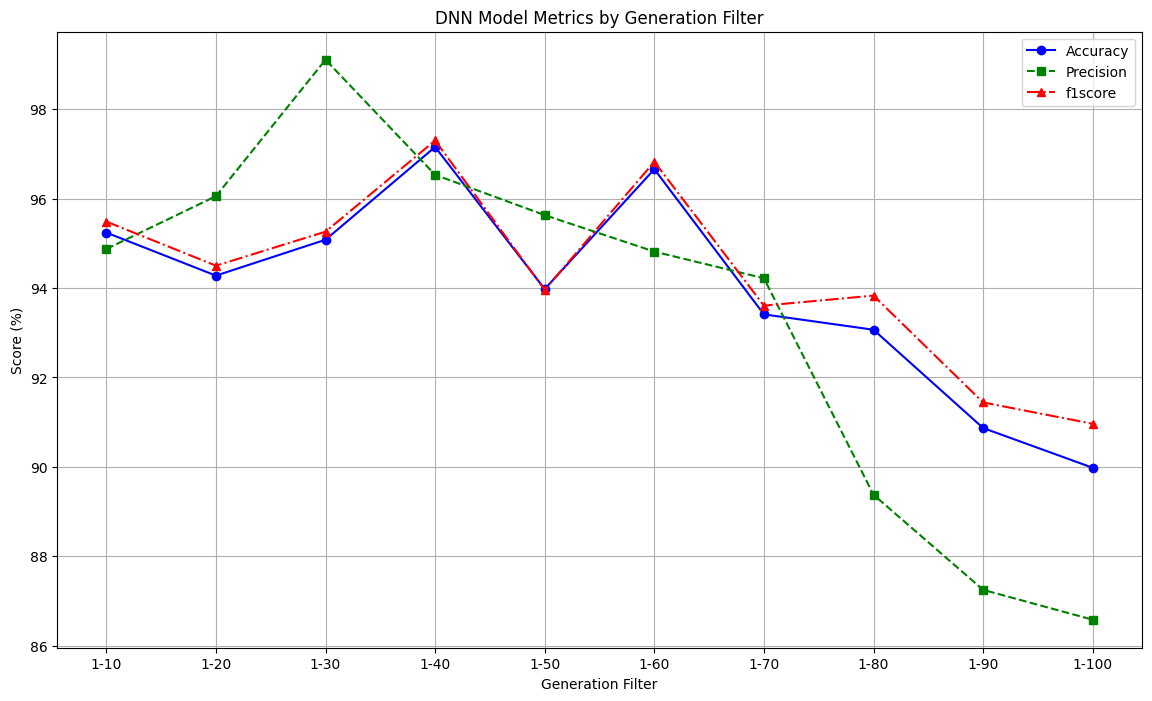

In [8]:
import matplotlib.pyplot as plt
gen_filters = list(scores.keys())
accuracies = [scores[gen_filter]['accuracy'] for gen_filter in gen_filters]
precisions = [scores[gen_filter]['precision'] for gen_filter in gen_filters]
recalls = [scores[gen_filter]['f1score'] for gen_filter in gen_filters]

plt.figure(figsize=(14, 8))

plt.plot(gen_filters, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(gen_filters, precisions, marker='s', linestyle='--', color='g', label='Precision')
plt.plot(gen_filters, recalls, marker='^', linestyle='-.', color='r', label='f1score')

plt.title('DNN Model Metrics by Generation Filter')
plt.xlabel('Generation Filter')
plt.ylabel('Score (%)')
plt.xticks(gen_filters) 
plt.grid(True)
plt.legend()
plt.savefig('Cummulative_Images/DNN_Model_Performance_by_Generation_Filter.png', dpi=400)
plt.show()